# The Sparks Foundation
## Data Science & Business Analytics Tasks - July 2021
### Task 3 - Exploratory Data Analysis - Retail
### Task: Perform ‘Exploratory Data Analysis’ then try to find out the weak areas where you can work to make more profit and What all business problems you can derive by exploring the data? 
#### Submitted by: Anuya Thakur

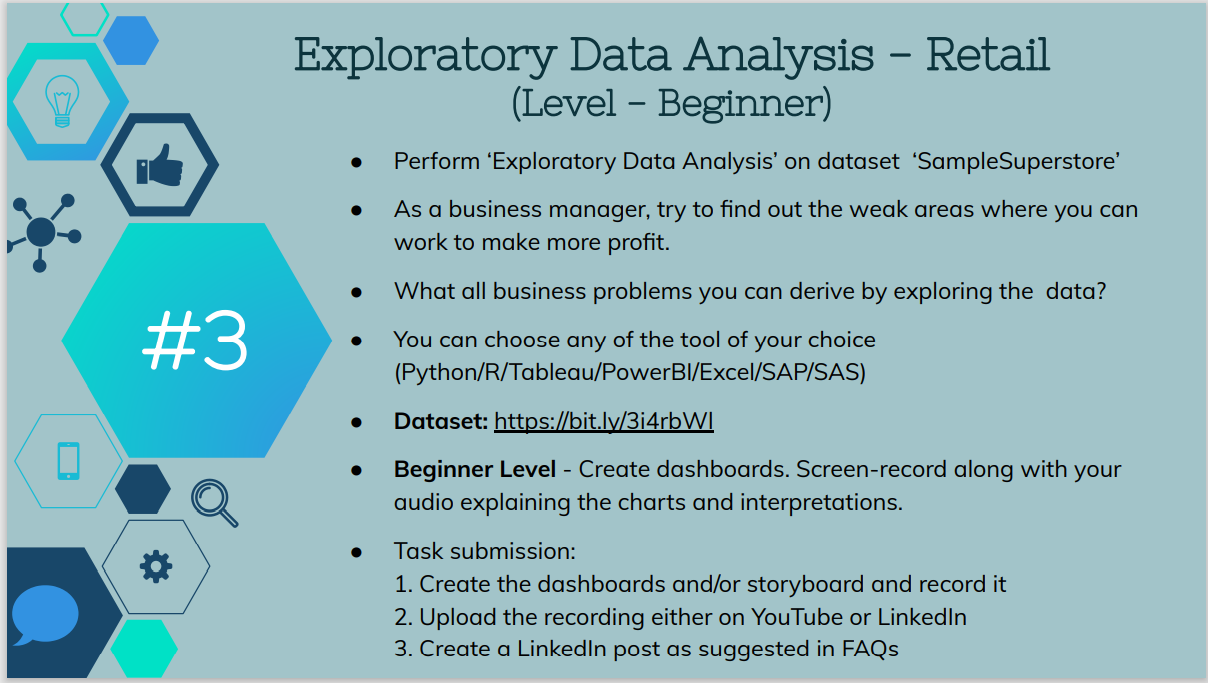


### Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

### Reading the Dataset

In [2]:
df=pd.read_csv("https://bit.ly/3i4rbWl",header=0)

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

This shows that the data contains no null values.

In [7]:
df.duplicated().sum()

17

The data contains 17 duplicate Rows so we will drop the rows which are repeated.

In [8]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
print("Number of Duplicate Rows: ",df.duplicated().sum())

Number of Duplicate Rows:  0


Here we have dropped Duplicate Rows. Now we will go for further Analysis.

#### Checking for Correlation

<AxesSubplot:>

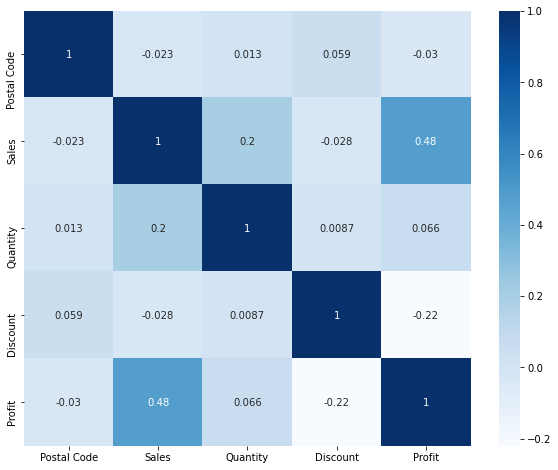

In [9]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

Here Postal Code despite of being an integer is a Area Code. Thus we cannot correate it with the others. 

To solve this Problem we convert Postal Code to Object.

In [10]:
df['Postal Code'] = df['Postal Code'].astype('object')

<AxesSubplot:>

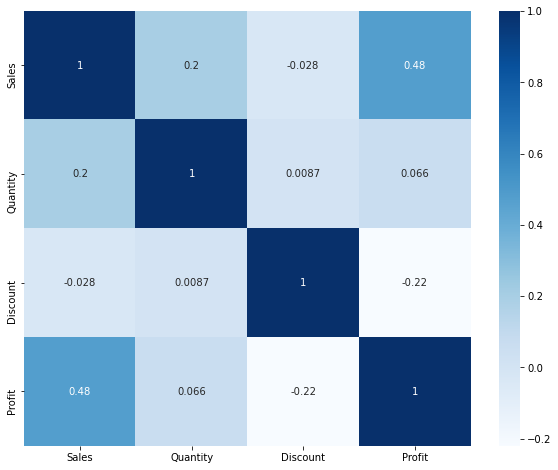

In [11]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

## Performing Exploratory Data Analysis

### Analysis on Ship Mode

In [12]:
df["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

This shows that most people prefer Standard Class.

In [13]:
sm=df[["Ship Mode","Profit"]].groupby(["Ship Mode"]).mean().sort_values(by="Profit", ascending=False)
sm

,Profit
Ship Mode,
First Class,31.850134
Second Class,29.565956
Same Day,29.283924
Standard Class,27.534715


<AxesSubplot:title={'center':'Profits according to Ship Mode'}, xlabel='Ship Mode', ylabel='Profits'>

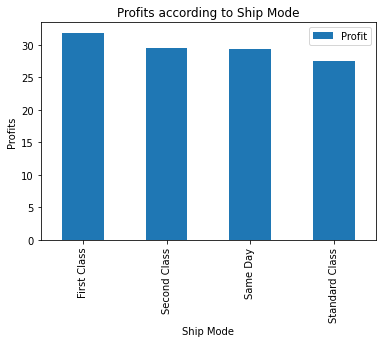

In [14]:
sm.plot(kind="bar",title="Profits according to Ship Mode",xlabel="Ship Mode",ylabel="Profits")

This shows that the profits are not much differing according to Ship Mode.

In [15]:
sm2=df[["Ship Mode","Sales"]].groupby(["Ship Mode"]).mean().sort_values(by="Sales", ascending=False)
sm2

,Sales
Ship Mode,
Same Day,236.755950
Second Class,236.323750
First Class,228.614490
Standard Class,227.928858


<AxesSubplot:title={'center':'Sales according to Ship Mode'}, xlabel='Ship Mode', ylabel='Sales'>

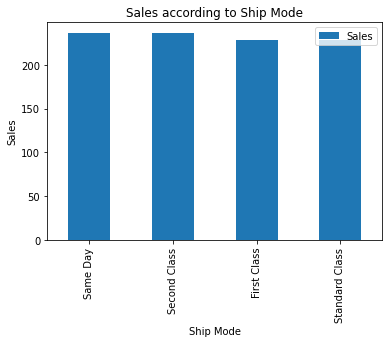

In [16]:
sm2.plot(kind="bar",title="Sales according to Ship Mode",xlabel="Ship Mode",ylabel="Sales")

We dont see much variation in Sales according to Ship Mode.

### Analysis on Segment

In [17]:
df["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [18]:
seg=df[["Segment","Profit"]].groupby(["Segment"]).mean().sort_values(by="Profit", ascending=False)
seg

,Profit
Segment,
Home Office,33.883643
Corporate,30.499164
Consumer,25.855188


array([<AxesSubplot:ylabel='Profit'>], dtype=object)

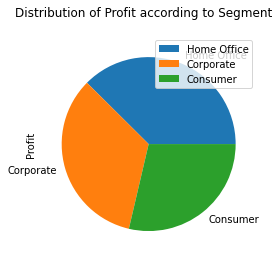

In [19]:
seg.plot(kind='pie',subplots=True,title="Distribution of Profit according to Segment")

The Pie chart shows that all the 3 are almost equal.

In [20]:
seg2=df[["Segment","Sales"]].groupby(["Segment"]).mean().sort_values(by="Sales", ascending=False)
seg2

,Sales
Segment,
Home Office,241.311234
Corporate,234.185781
Consumer,223.969279


array([<AxesSubplot:ylabel='Sales'>], dtype=object)

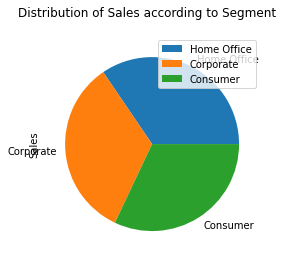

In [21]:
seg2.plot(kind='pie',subplots=True,title="Distribution of Sales according to Segment")

The Pie Chart shows that Sales in all 3 Segments are equally distributed.

### Analysis on Country

In [22]:
df["Country"].value_counts()

United States    9977
Name: Country, dtype: int64

Here we have only 1 country that is United States.

### Analysis on City

In [23]:
df["City"].value_counts()

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Norfolk            1
Tinley Park        1
Littleton          1
Glenview           1
Saint Peters       1
Name: City, Length: 531, dtype: int64

We have 531 cities here.

In [24]:
city1 = df.groupby('City').sum()['Profit'].sort_values(ascending=False).reset_index()

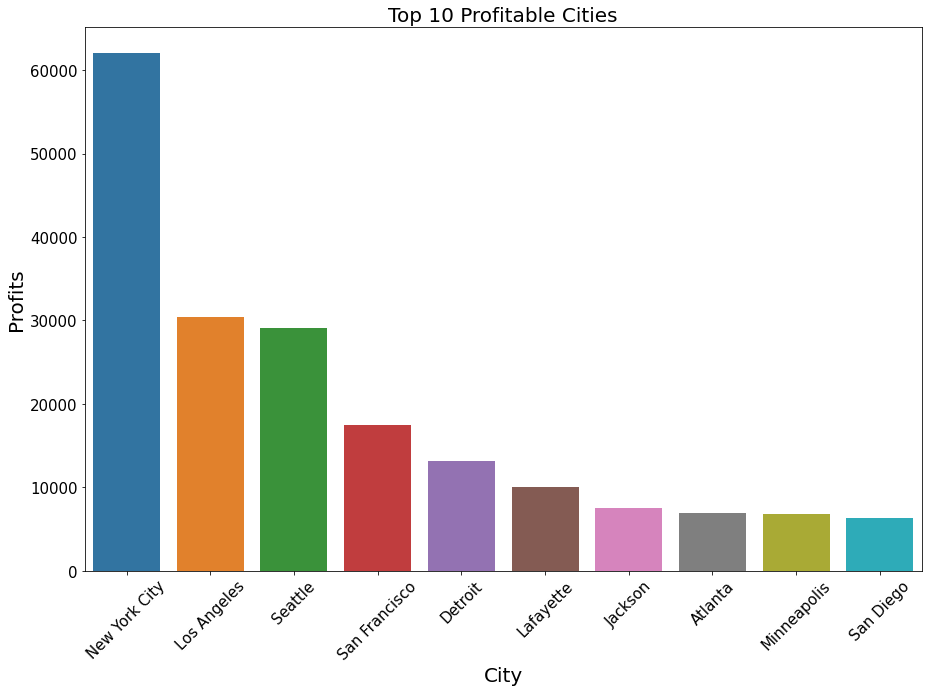

In [25]:
plt.figure(figsize=(15,10))
plt.title('Top 10 Profitable Cities',fontsize = 20)
sns.barplot(x = 'City',y = 'Profit',data = city1.head(10))
plt.xticks(rotation = 45 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel("City",fontsize = 20)
plt.ylabel("Profits",fontsize = 20)
plt.show()

This shows that **New York City** and **Los Angeles** are the Cities which Earn Maximum Profits.

In [26]:
city2 = df.groupby('City').sum()['Sales'].sort_values(ascending=False).reset_index()

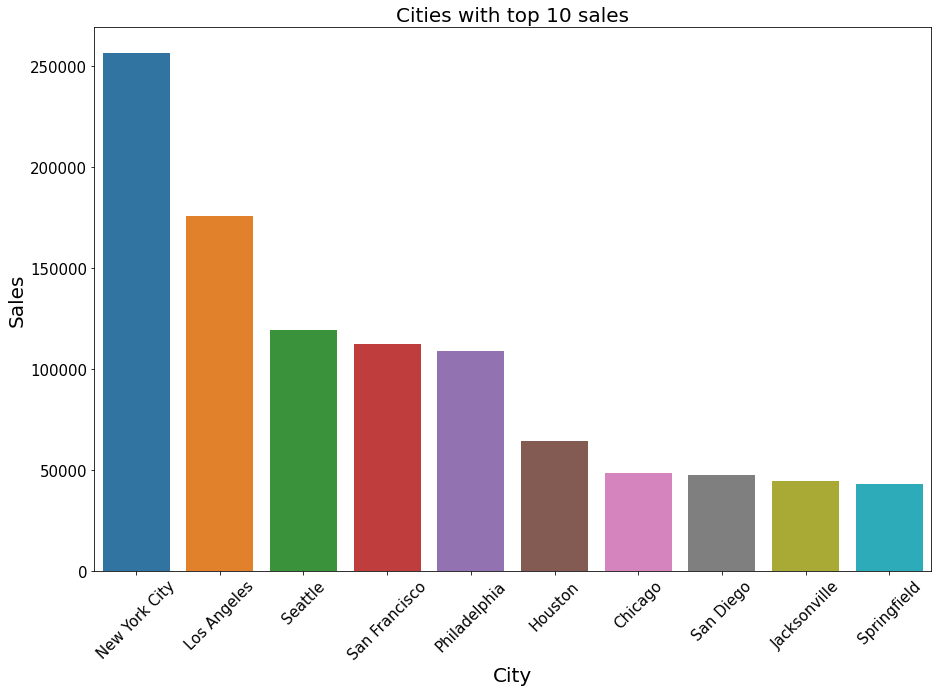

In [27]:
plt.figure(figsize=(15,10))
plt.title('Cities with top 10 sales',fontsize = 20)
sns.barplot(x = 'City',y = 'Sales',data = city2.head(10))
plt.xticks(rotation = 45 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel("City",fontsize = 20)
plt.ylabel("Sales",fontsize = 20)
plt.show()

This shows that **New York City** and **Los Angeles** are the Cities which have Highest Sales.

### Analysis on State

In [28]:
df["State"].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [29]:
state1 = df.groupby('State').sum()['Profit'].sort_values(ascending=False).reset_index()

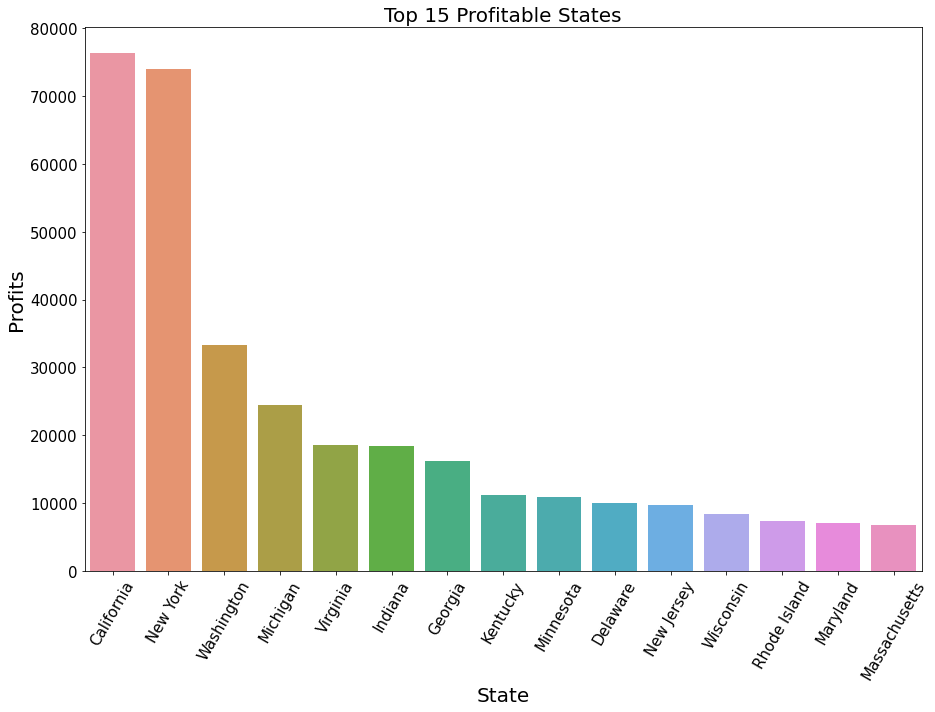

In [30]:
plt.figure(figsize=(15,10))
plt.title('Top 15 Profitable States',fontsize = 20)
sns.barplot(x = 'State',y = 'Profit', data = state1.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel("State",fontsize = 20)
plt.ylabel("Profits",fontsize = 20)
plt.show()

This shows that **California** and **New York** are the Most Profitable States.

In [31]:
state2 = df.groupby('State').sum()['Sales'].sort_values(ascending=False).reset_index()

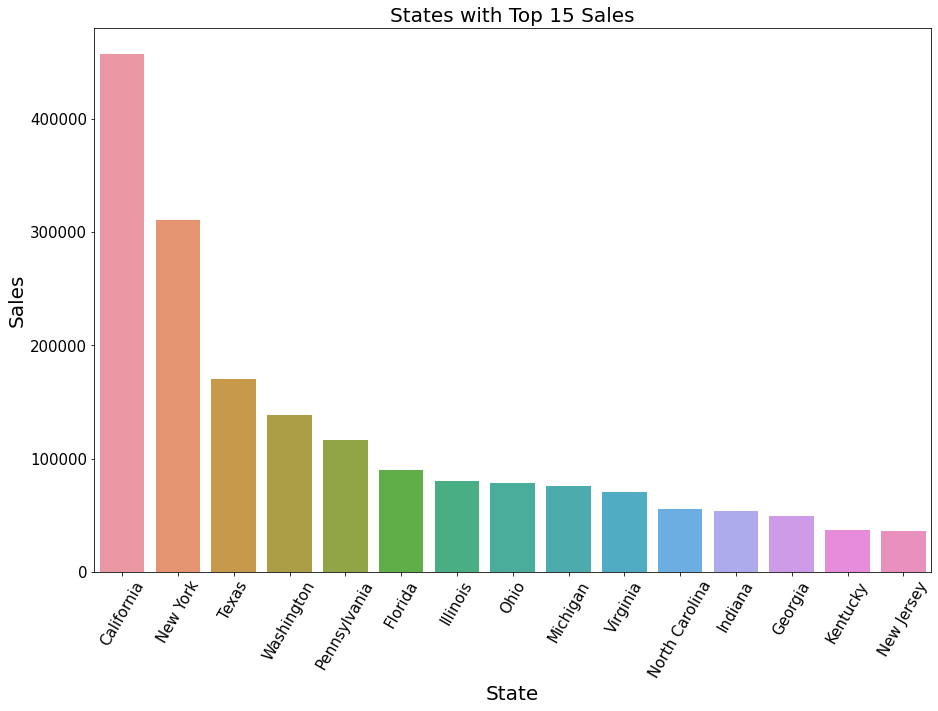

In [32]:
plt.figure(figsize=(15,10))
plt.title('States with Top 15 Sales',fontsize = 20)
sns.barplot(x = 'State',y = 'Sales', data = state2.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel("State",fontsize = 20)
plt.ylabel("Sales",fontsize = 20)
plt.show()

This shows that **California** and **New York** are the States with highest Sales.

### Analysis on Postal Code

In [33]:
df["Postal Code"].value_counts()

10035    263
10024    230
10009    229
94122    199
10011    192
        ... 
33458      1
60462      1
98002      1
68701      1
90604      1
Name: Postal Code, Length: 631, dtype: int64

In [34]:
code = df.groupby('Postal Code').sum()['Profit'].sort_values(ascending=False).reset_index()
code

,Postal Code,Profit
0,10024,21653.7248
1,10035,16533.8669
2,10009,13697.0019
3,98115,13297.6547
4,10011,10129.3037
...,...,...
626,19140,-5168.3905
627,60653,-5672.5612
628,27217,-5894.5269
629,43130,-7149.6180


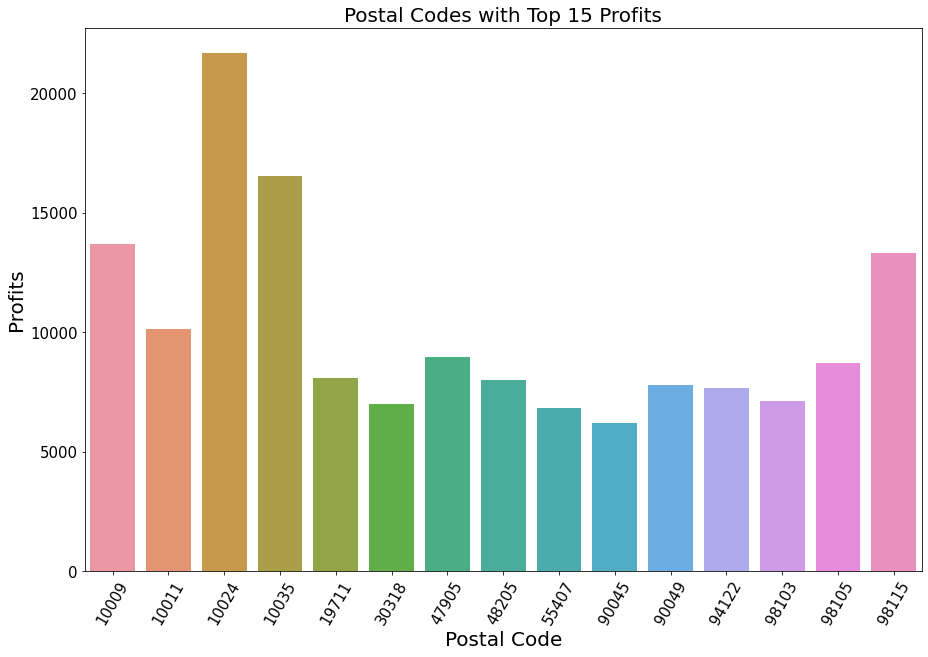

In [35]:
plt.figure(figsize=(15,10))
plt.title('Postal Codes with Top 15 Profits',fontsize = 20)
sns.barplot(x = 'Postal Code',y = 'Profit', data = code.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel("Postal Code",fontsize = 20)
plt.ylabel("Profits",fontsize = 20)
plt.show()

We can identify Postal Codes with Maximum Profits.

In [36]:
code2 = df.groupby('Postal Code').sum()['Sales'].sort_values(ascending=False).reset_index()
code2

,Postal Code,Sales
0,10024,78697.182
1,10035,77357.885
2,10009,54761.496
3,94122,52575.547
4,10011,45502.478
...,...,...
626,32174,2.808
627,32503,2.214
628,33458,2.064
629,44035,1.824


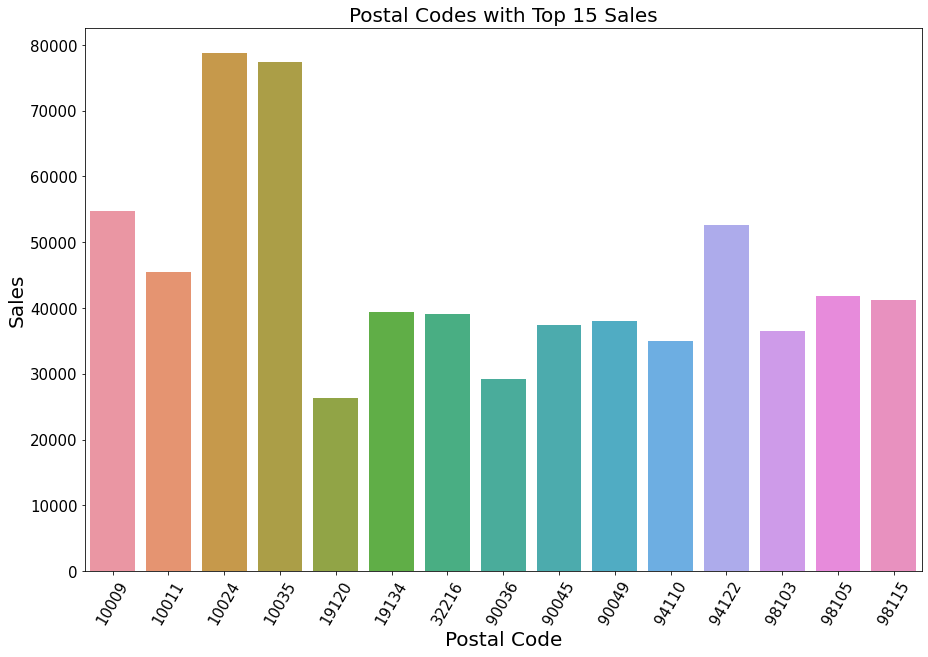

In [37]:
plt.figure(figsize=(15,10))
plt.title('Postal Codes with Top 15 Sales',fontsize = 20)
sns.barplot(x = 'Postal Code',y = 'Sales', data = code2.head(15)) #printing first 15 highest profitable states
plt.xticks(rotation = 60 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel("Postal Code",fontsize = 20)
plt.ylabel("Sales",fontsize = 20)
plt.show()

We can identify Postal Codes with maximum Sales.

### Analysis on Region

In [38]:
df["Region"].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [39]:
reg=df[["Region","Profit"]].groupby(["Region"]).mean().sort_values(by="Profit", ascending=False)
reg

,Profit
Region,
West,33.927281
East,32.163905
South,28.857673
Central,17.100421


<AxesSubplot:title={'center':'Distribution of Profit according to Region'}, xlabel='Region'>

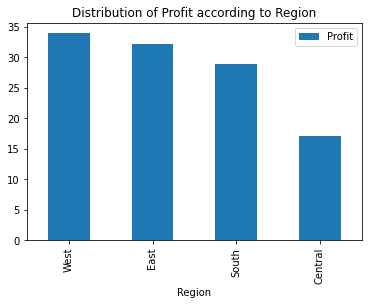

In [40]:
reg.plot(kind='bar',title="Distribution of Profit according to Region")

We can see East and West have more profits than South or Central.

In [41]:
reg2=df[["Region","Sales"]].groupby(["Region"]).mean().sort_values(by="Sales", ascending=False)
reg2

,Sales
Region,
South,241.803645
East,238.465798
West,227.139254
Central,215.947759


<AxesSubplot:title={'center':'Distribution of Sales according to Region'}, xlabel='Region'>

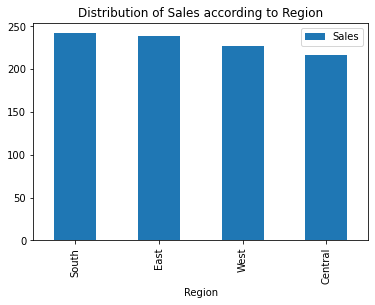

In [42]:
reg2.plot(kind='bar',title="Distribution of Sales according to Region")

All the 4 regions seems somewhat equivalent in terms of Sales. But so to say Sales in the South and the Eastern Region are more

### Analysis on Category

In [43]:
df["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [44]:
cat=df[["Category","Profit"]].groupby(["Category"]).mean().sort_values(by="Profit", ascending=False)
cat

,Profit
Category,
Technology,78.752002
Office Supplies,20.353403
Furniture,8.697740


array([<AxesSubplot:ylabel='Profit'>], dtype=object)

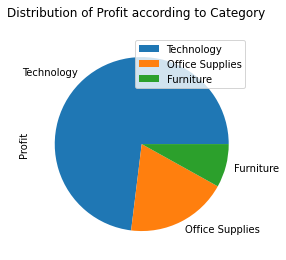

In [45]:
cat.plot(kind='pie',subplots=True,title="Distribution of Profit according to Category")

The Pie Chart shows that Stores earn More profits from Technology than the other Categories

In [46]:
cat2=df[["Category","Sales"]].groupby(["Category"]).mean().sort_values(by="Sales", ascending=False)
cat2

,Sales
Category,
Technology,452.709276
Furniture,350.002981
Office Supplies,119.550107


<AxesSubplot:title={'center':'Distribution of Sales according to Category'}, xlabel='Category'>

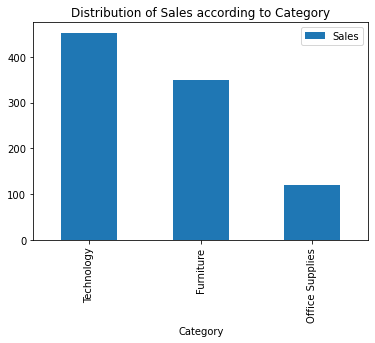

In [47]:
cat2.plot(kind='bar',title="Distribution of Sales according to Category")

We can see that Technology is having the Highest Sales followed by Furniture.

### Analysis on Sub-Categories

In [48]:
df["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [49]:
sc=df[["Sub-Category","Profit"]].groupby(["Sub-Category"]).mean().sort_values(by="Profit", ascending=False)
sc

,Profit
Sub-Category,
Copiers,817.909190
Accessories,54.111788
Phones,50.073938
Chairs,43.198582
Appliances,38.922758
Machines,29.432669
Envelopes,27.418019
Storage,25.152277
Paper,24.977365


<AxesSubplot:title={'center':'Profits according to Sub-Categories'}, ylabel='Shub-Categories'>

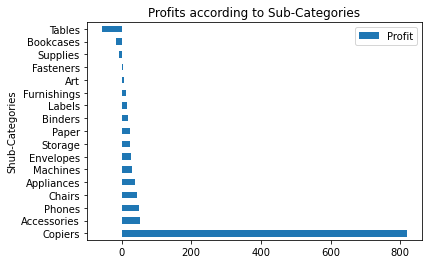

In [50]:
sc.plot(kind="barh",title="Profits according to Sub-Categories",xlabel="Shub-Categories",ylabel="Profits")

We can see that Copiers are the most profitable amongst all the Sub-Categories

In [51]:
sc2=df[["Sub-Category","Sales"]].groupby(["Sub-Category"]).mean().sort_values(by="Sales", ascending=False)
sc2

,Sales
Sub-Category,
Copiers,2198.941618
Machines,1645.553313
Tables,648.794771
Chairs,532.971969
Bookcases,503.859633
Phones,371.211534
Storage,264.590553
Supplies,245.650200
Appliances,230.755710


<AxesSubplot:title={'center':'Sales according to Sub-Categories'}, ylabel='Sub-Categories'>

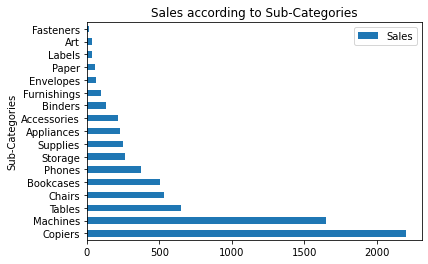

In [62]:
sc2.plot(kind="barh",title="Sales according to Sub-Categories",xlabel="Sub-Categories",ylabel="Sales")

We can see that the sale of Copiers is the Highest followed by Machines.

### Analysis on Sales

In [53]:
mins=df['Sales'].min()
maxs=df['Sales'].max()
print("Minimum Sales: ",mins)
print("Maximum Sales: ",maxs)

Minimum Sales:  0.444
Maximum Sales:  22638.48


<AxesSubplot:xlabel='Sales'>

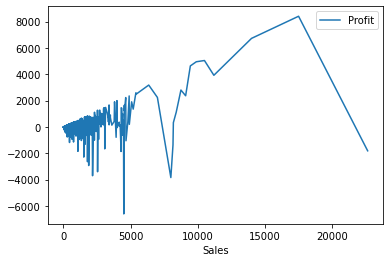

In [54]:
sale=df[["Sales","Profit"]].groupby(["Sales"]).mean()
sale.plot(kind='line')

We can see that the Profits are increasing with Sales and suddenly start falling after a Point.

### Analysis on Quantity

In [55]:
minq=df['Quantity'].min()
maxq=df['Quantity'].max()
print("Minimum Quantity: ",minq)
print("Maximum Quantity: ",maxq)

Minimum Quantity:  1
Maximum Quantity:  14


<AxesSubplot:xlabel='Quantity'>

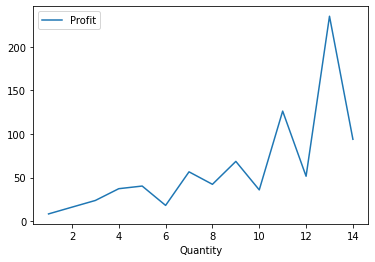

In [56]:
quan=df[["Quantity","Profit"]].groupby(["Quantity"]).mean()
quan.plot(kind='line')

We can say that the Profits increase along with the increase in Quantity.

<AxesSubplot:xlabel='Quantity'>

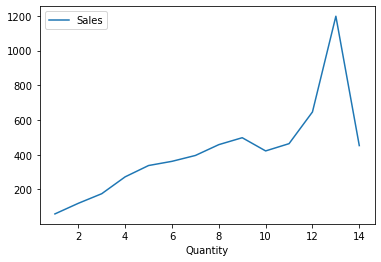

In [57]:
quan2=df[["Quantity","Sales"]].groupby(["Quantity"]).mean()
quan2.plot(kind='line')

We can see thaty Sales increases along with Quantity.

### Analysis on Discount

In [58]:
mind=df['Discount'].min()
maxd=df['Discount'].max()
print("Minimum Discount: ",mind)
print("Maximum Discount: ",maxd)

Minimum Discount:  0.0
Maximum Discount:  0.8


<AxesSubplot:xlabel='Discount'>

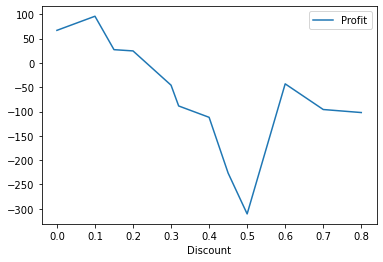

In [59]:
disc=df[["Discount","Profit"]].groupby(["Discount"]).mean()
disc.plot(kind='line')

This shows that Profits decrease with increasing discount and Starts increasing after a point.

<AxesSubplot:xlabel='Discount'>

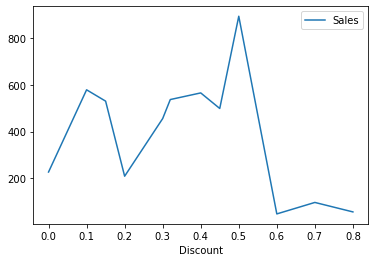

In [60]:
disc2=df[["Discount","Sales"]].groupby(["Discount"]).mean()
disc2.plot(kind='line')

We can see that Sales increases with increasing discounts and then starts decreasing after a point.

### Analysis on Profit

In [61]:
minp=df["Profit"].min()
maxp=df["Profit"].max()
print("Minimum Value of Profit: ",minp)
print("Maximum Value of Profit: ",maxp)

Minimum Value of Profit:  -6599.978
Maximum Value of Profit:  8399.976


### Conclusion

#### Try to find out the weak areas where you can work to make more profit.

1) We can see that the Profits are more in West and East so the sales in those areas should be increased by giving some discounts and offers.

2) Profits generated by Furniture are less but the Sales are more in comparison to the Profits thus, the Sales can be reduced for Furniture and increased more for Technology.

3) There are a few Sub- Categories which have profits in Negative i.e Losses, thus we can reduce the Sales of those Sub-Categories.


#### What all business problems you can derive by exploring the data? 

1) Identifying areas where profits can be made.

2) Optimum distribution of Resources.